## **Importing Required Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Dataset Column Descriptions

- **Rank**: The position of the movie in the dataset ranking (from 1 to 1000).  
- **Title**: The name of the movie.  
- **Genre**: Categories or classifications of the movie (e.g., Action, Comedy, Drama).  
- **Description**: A brief summary or plot outline of the movie.  
- **Director**: The person who directed the movie.  
- **Actors**: The main actors and actresses featured in the movie.  
- **Year**: The year in which the movie was released.  
- **Runtime (Minutes)**: The length of the movie in minutes.  
- **Rating**: The IMDb user rating of the movie (scale of 1–10).  
- **Votes**: The total number of IMDb user votes the movie received.  
- **Revenue (Millions)**: The box office revenue of the movie in millions of USD.  
- **Metascore**: A score assigned by Metacritic, based on critic reviews (scale of 0–100).  


In [2]:
df = pd.read_csv(r"E:\Internship Projects AT\Movie Rating Prediction\IMDB-Movie-Data.csv")

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
df.isnull().sum(axis = 0)

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [7]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [8]:
df.drop(columns = ["Rank","Title","Description"],inplace = True)

In [9]:
df.head()

,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [10]:
len(df["Genre"].unique())

207

In [11]:
df.dropna(subset = ["Revenue (Millions)","Metascore"],inplace = True)

In [12]:
df.shape

(838, 9)

In [13]:
len(df["Director"].unique())

524

In [14]:
df_genre = df['Genre'].str.get_dummies(sep=',')
df = pd.concat([df, df_genre], axis=1)
df.head()

,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,1,...,0,0,0,0,0,1,0,0,0,0
1,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,0,...,0,0,0,1,0,1,0,0,0,0
2,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,0,...,1,0,0,0,0,0,0,1,0,0
3,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
N = 20
top_directors = df['Director'].value_counts().nlargest(N).index
df['Director_clean'] = df['Director'].where(df['Director'].isin(top_directors), 'Other')

df_director = pd.get_dummies(df['Director_clean'], prefix='Director')
df_director = df_director.astype(int)
df = pd.concat([df, df_director], axis=1)
df.head()

,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,...,Director_Martin Scorsese,Director_Michael Bay,Director_Other,Director_Paul Feig,Director_Paul W.S. Anderson,Director_Peter Berg,Director_Ridley Scott,Director_Tim Burton,Director_Woody Allen,Director_Zack Snyder
0,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,1,...,0,0,1,0,0,0,0,0,0,0
1,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,0,...,0,0,0,0,0,0,1,0,0,0
2,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,0,...,0,0,1,0,0,0,0,0,0,0
4,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1,...,0,0,1,0,0,0,0,0,0,0


In [16]:
N = 20
actors_split = df['Actors'].str.split(',').explode()
top_actors = actors_split.value_counts().nlargest(N).index
for actor in top_actors:
    df[f'Actor_{actor.strip()}'] = df['Actors'].apply(lambda x: int(actor in x))
df.head()

,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,...,Actor_Hugh Jackman,Actor_Michelle Monaghan,Actor_Tom Hanks,Actor_Morgan Freeman,Actor_Joel Edgerton,Actor_Denzel Washington,Actor_Scarlett Johansson,Actor_Matthew McConaughey,Actor_Will Smith,Actor_Anne Hathaway
0,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,1,...,0,0,0,0,0,0,0,0,0,0
1,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,0,...,0,0,0,0,0,0,1,1,0,0
4,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1,...,0,0,0,0,0,0,0,0,1,0


In [17]:
df.drop(columns = ["Genre",	"Director",	"Actors"],inplace = True)

In [18]:
df.head()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Animation,Biography,...,Actor_Hugh Jackman,Actor_Michelle Monaghan,Actor_Tom Hanks,Actor_Morgan Freeman,Actor_Joel Edgerton,Actor_Denzel Washington,Actor_Scarlett Johansson,Actor_Matthew McConaughey,Actor_Will Smith,Actor_Anne Hathaway
0,2014,121,8.1,757074,333.13,76.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012,124,7.0,485820,126.46,65.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,117,7.3,157606,138.12,62.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,108,7.2,60545,270.32,59.0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,2016,123,6.2,393727,325.02,40.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


C:\Users\UMC\AppData\Local\Temp\ipykernel_2960\2706463092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df["Year"], palette="coolwarm", order=df["Year"].value_counts().index)


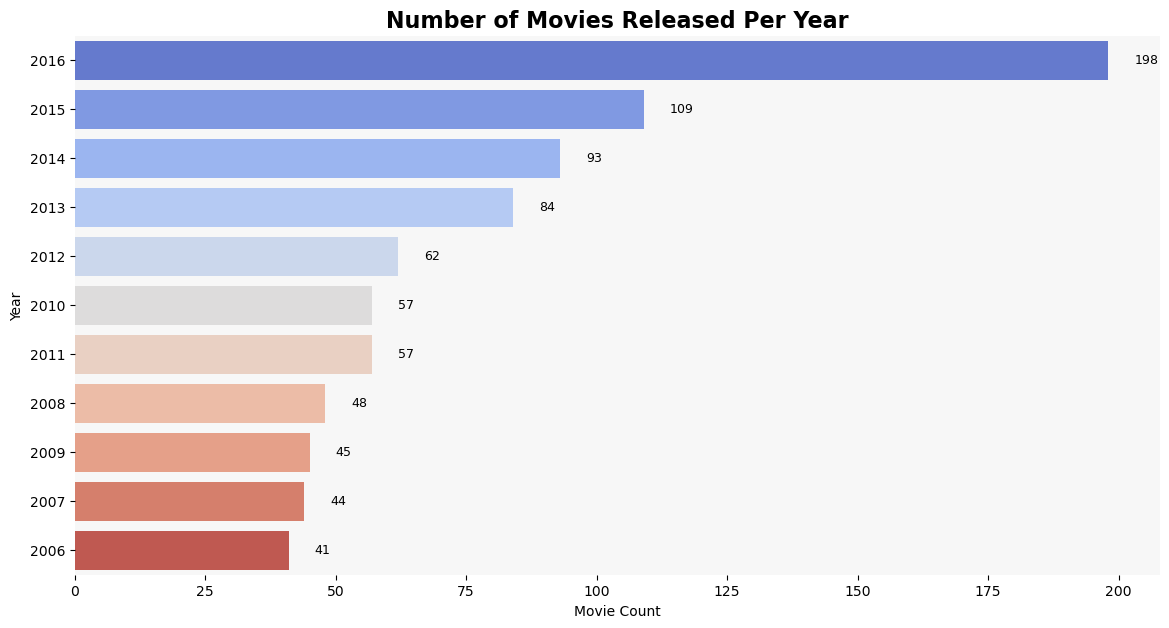

In [19]:
plt.figure(figsize=(14,7))
ax = sns.countplot(y=df["Year"], palette="coolwarm", order=df["Year"].value_counts().index)

sns.despine(left=True, bottom=True)
for p in ax.patches:
    ax.text(p.get_width() + 5, p.get_y() + p.get_height()/2, 
            int(p.get_width()), ha="left", va="center", fontsize=9, color="black")
plt.title("Number of Movies Released Per Year", fontsize=16, weight="bold")
plt.xlabel("Movie Count")
plt.ylabel("Year")
plt.gca().set_facecolor("#f7f7f7")
plt.show()

In [20]:
df.shape

(838, 68)

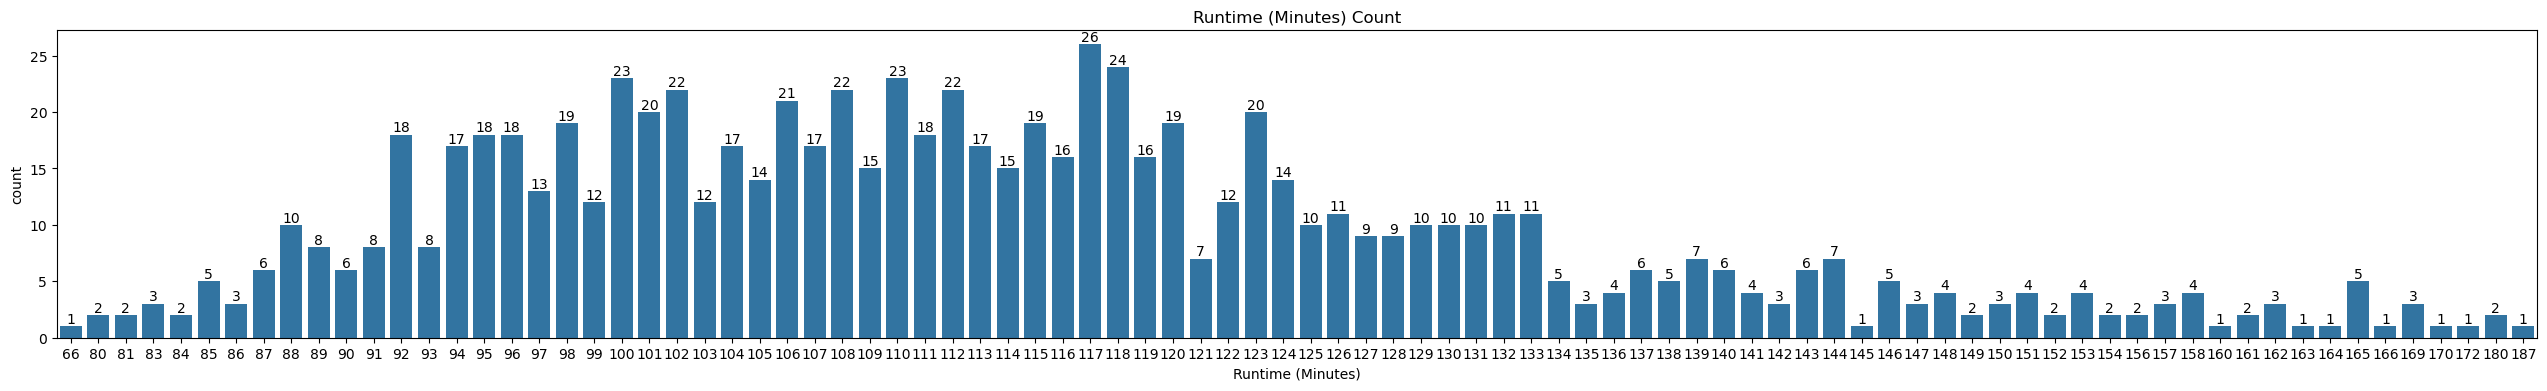

In [21]:
plt.figure(figsize = (32,4))
ax = sns.countplot(x =df["Runtime (Minutes)"])
plt.title("Runtime (Minutes) Count")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

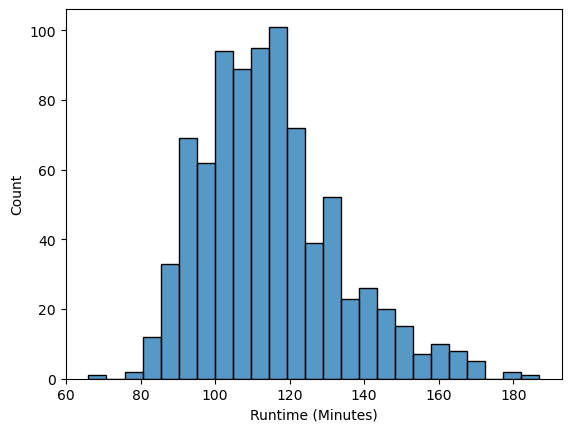

In [22]:
sns.histplot(df["Runtime (Minutes)"])
plt.show()

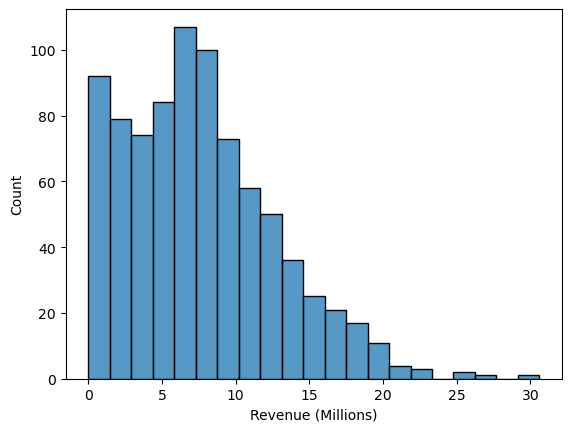

In [23]:
sns.histplot(np.sqrt(df["Revenue (Millions)"]))
plt.show()

In [24]:
df["Revenue (Millions)"] = np.sqrt(df["Revenue (Millions)"])

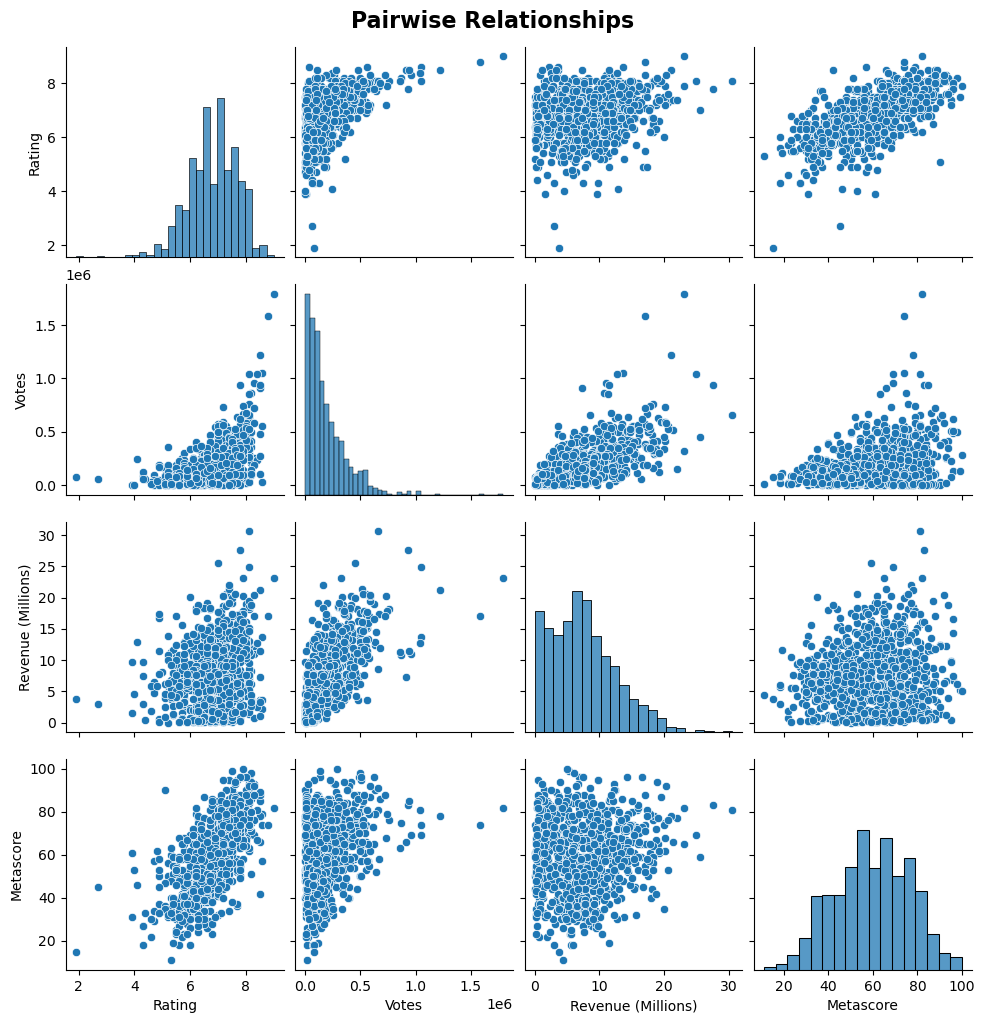

In [25]:
sns.pairplot(df[['Rating','Votes','Revenue (Millions)','Metascore']])
plt.suptitle("Pairwise Relationships", y=1.02, fontsize=16, weight="bold")
plt.show()

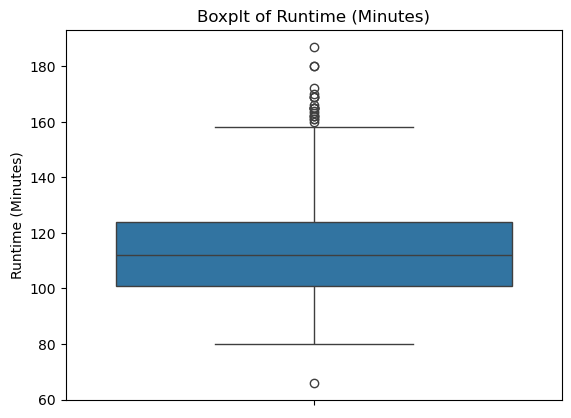

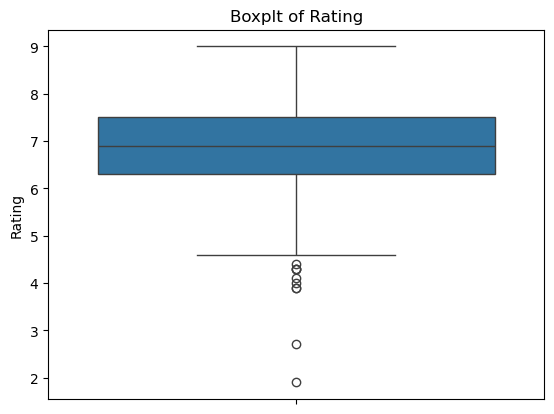

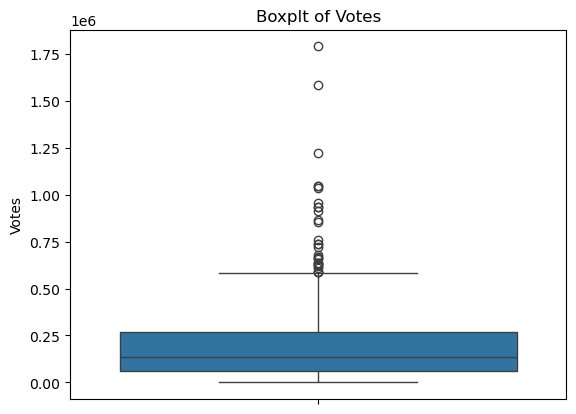

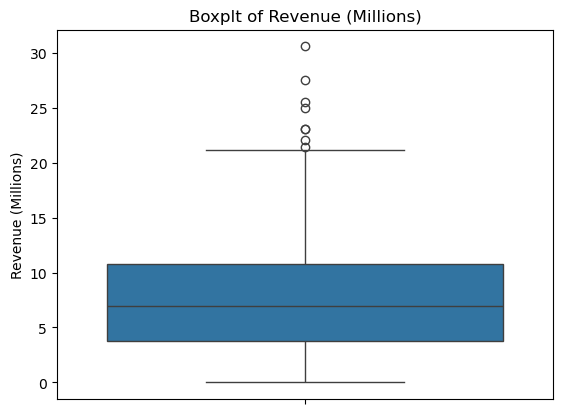

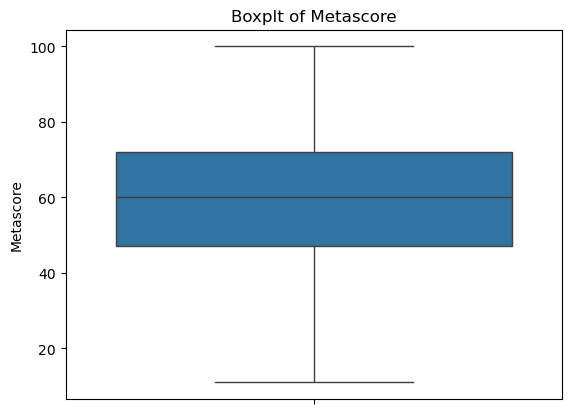

In [26]:
for i in ['Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore']:
    sns.boxplot(y = df[i])
    plt.title(f"Boxplt of {i}")
    plt.show()

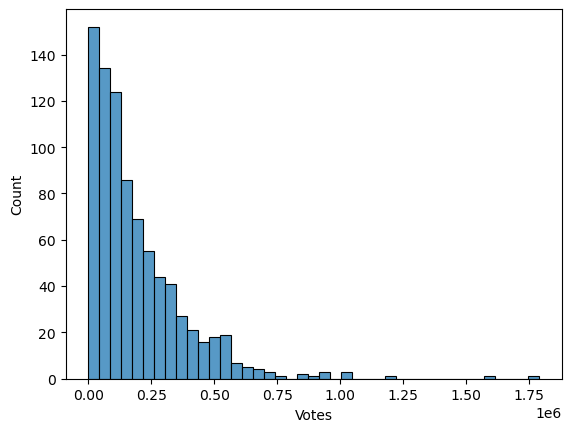

In [27]:
sns.histplot(x = (df["Votes"]))
plt.show()

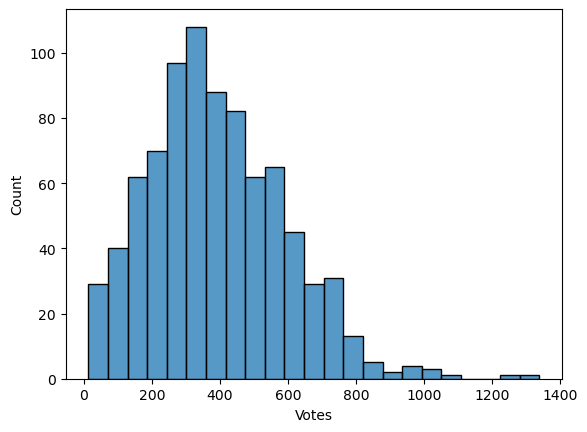

In [28]:
sns.histplot(x = np.sqrt(df["Votes"]))
plt.show()

In [29]:
df["Votes"] = np.sqrt(df["Votes"])

In [30]:
df.head()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Animation,Biography,...,Actor_Hugh Jackman,Actor_Michelle Monaghan,Actor_Tom Hanks,Actor_Morgan Freeman,Actor_Joel Edgerton,Actor_Denzel Washington,Actor_Scarlett Johansson,Actor_Matthew McConaughey,Actor_Will Smith,Actor_Anne Hathaway
0,2014,121,8.1,870.099994,18.251849,76.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012,124,7.0,697.007891,11.245444,65.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,117,7.3,396.996222,11.752447,62.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,108,7.2,246.058936,16.441411,59.0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,2016,123,6.2,627.476693,18.028311,40.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
df.drop(columns = ["Director_clean"],inplace = True)

In [35]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [36]:
X = df.drop("Rating", axis=1)   
y = df["Rating"]                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (670, 66)
Test shape: (168, 66)


In [37]:
pipelines = {
    "Linear Regression": Pipeline([
        ("poly", PolynomialFeatures()), 
        ("lr", LinearRegression())
    ]),
    "Ridge": Pipeline([
        ("poly", PolynomialFeatures()), 
        ("ridge", Ridge())
    ]),
    "Lasso": Pipeline([
        ("poly", PolynomialFeatures()), 
        ("lasso", Lasso(max_iter=10000))
    ]),
    "Random Forest": Pipeline([
        ("rf", RandomForestRegressor(random_state=42))
    ])
}

param_grids = {
    "Linear Regression": {
        "poly__degree": [1, 2, 3]
    },
    "Ridge": {
        "poly__degree": [1, 2, 3],
        "ridge__alpha": [0.01, 0.1, 1, 10, 100]
    },
    "Lasso": {
        "poly__degree": [1, 2],
        "lasso__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]
    },
    "Random Forest": {
        "rf__n_estimators": [100, 200, 300],
        "rf__max_depth": [None, 10, 20, 30],
        "rf__min_samples_split": [2, 5, 10]
    }
}

results = {}

for name, pipeline in pipelines.items():
    print(f"\n Running GridSearch for {name}...")
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring="r2", n_jobs=-1)
    grid.fit(X_train_scaled, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    results[name] = {
        "Best Params": grid.best_params_,
        "Train R²": grid.best_score_,
        "Test R²": r2_score(y_test, y_pred)
    }

for model, res in results.items():
    print(f"\n {model}")
    print("Best Params:", res["Best Params"])
    print("Train R²:", round(res["Train R²"], 4))
    print("Test R²:", round(res["Test R²"], 4))



 Running GridSearch for Linear Regression...

 Running GridSearch for Ridge...

 Running GridSearch for Lasso...

 Running GridSearch for Random Forest...

 Linear Regression
Best Params: {'poly__degree': 1}
Train R²: 0.6089
Test R²: 0.6465

 Ridge
Best Params: {'poly__degree': 1, 'ridge__alpha': 10}
Train R²: 0.612
Test R²: 0.6526

 Lasso
Best Params: {'lasso__alpha': 0.01, 'poly__degree': 1}
Train R²: 0.6269
Test R²: 0.6706

 Random Forest
Best Params: {'rf__max_depth': None, 'rf__min_samples_split': 10, 'rf__n_estimators': 300}
Train R²: 0.556
Test R²: 0.6502


In [38]:
final_lasso = Pipeline([
    ("poly", PolynomialFeatures(degree=1)),
    ("lasso", Lasso(alpha=0.01, max_iter=10000, random_state=42))
])

final_lasso.fit(X_train_scaled, y_train)

y_pred_train = final_lasso.predict(X_train_scaled)
y_pred_test = final_lasso.predict(X_test_scaled)

print("Final Lasso Model (Best Params)")
print("Train R²:", round(r2_score(y_train, y_pred_train), 4))
print("Test R²:", round(r2_score(y_test, y_pred_test), 4))
print("Test RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 4))

Final Lasso Model (Best Params)
Train R²: 0.6704
Test R²: 0.6706
Test RMSE: 0.511
